<a href="https://colab.research.google.com/github/chickenleaf/TitanicProblem/blob/main/Titanic_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

a = pd.read_csv('train.csv')
b = pd.read_csv('test.csv')

e = pd.DataFrame({'PassengerId': b.PassengerId})

a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(a['Cabin'].isnull().sum())
print(a['Cabin'].nunique())

687
147


In [ ]:
a = a.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
b = b.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

a.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a7fa91f10>]],
      dtype=object)

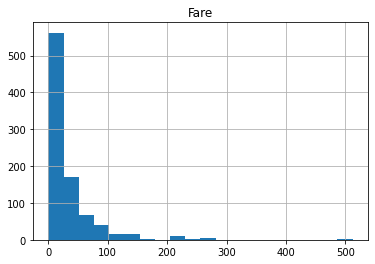

In [ ]:
a.hist(column='Fare', bins=20)

In [ ]:

def f0(row):
  if row['Fare']<=90:
    value=0
  else:
    value=1
  return value

a['Fare'] = a.apply(f0, axis=1)

b['Fare'] = b.apply(f0, axis=1)


In [ ]:
a['Cabin'] = pd.factorize(a['Cabin'])[0]
a['Sex'] = pd.factorize(a['Sex'])[0]

b['Cabin'] = pd.factorize(b['Cabin'])[0]
b['Sex'] = pd.factorize(b['Sex'])[0]

def f(row):
  if row['Cabin']==-1:
    value=0
  else:
    value=1
  return value

a['Cabin_Exists'] = a.apply(f, axis=1)
b['Cabin_Exists'] = b.apply(f, axis=1)

a.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Exists
0,0,3,0,22.0,1,0,0,-1,S,0
1,1,1,1,38.0,1,0,0,0,C,1
2,1,3,1,26.0,0,0,0,-1,S,0
3,1,1,1,35.0,1,0,0,1,S,1
4,0,3,0,35.0,0,0,0,-1,S,0


In [ ]:
a = a.drop(['Cabin'], axis=1)
b = b.drop(['Cabin'], axis=1)
a.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Exists
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.199194,0.316912
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.409426,-0.725541
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.162372,0.140391
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.042908,0.249732
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.034077,-0.040460
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.149442,0.036987
Fare,0.199194,-0.409426,0.162372,0.042908,0.034077,0.149442,1.000000,0.370593
Cabin_Exists,0.316912,-0.725541,0.140391,0.249732,-0.040460,0.036987,0.370593,1.000000


In [ ]:
def f1(row):
  value = row['SibSp'] + row['Parch']
  return value

a['Family'] = a.apply(f1, axis=1)
b['Family'] = b.apply(f1, axis=1)

a = a.drop(['SibSp', 'Parch'], axis=1)
b = b.drop(['SibSp', 'Parch'], axis=1)

a.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Exists,Family
0,0,3,0,22.0,0,S,0,1
1,1,1,1,38.0,0,C,1,1
2,1,3,1,26.0,0,S,0,0
3,1,1,1,35.0,0,S,1,1
4,0,3,0,35.0,0,S,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# split data
train = a.loc[(a['Age'].notnull())]  # known age values
test = a.loc[(a['Age'].isnull())]  # all nan age values

train_b = b.loc[(b['Age'].notnull())]  # known age values
test_b = b.loc[(b['Age'].isnull())]  # all nan age values

# select age column
y = train.values[:, 3]
y_b = train_b.values[:, 2]

# select pclass, fare and family
X = train.values[:, [1, 7]]
X_b = train_b.values[:, [0, 6]]

# create RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=7)

# Fit a model
rfr.fit(X, y)
rfr.fit(X_b, y_b)

# Use the fitted model to predict the missing values
predictedAges = rfr.predict(test.values[:, [1, 7]])

predictedAges_b = rfr.predict(test_b.values[:, [0, 6]])

# create predicted age column
a['pred_age'] = a['Age']

b['pred_age'] = b['Age']


# fill column
a.loc[(a['pred_age'].isnull()), 'pred_age'] = predictedAges

b.loc[(b['pred_age'].isnull()), 'pred_age'] = predictedAges_b


a = a.drop(['Age'], axis=1)

b = b.drop(['Age'], axis=1)

a.head()

,Survived,Pclass,Sex,Fare,Embarked,Cabin_Exists,Family,pred_age
0,0,3,0,0,S,0,1,22.0
1,1,1,1,0,C,1,1,38.0
2,1,3,1,0,S,0,0,26.0
3,1,1,1,0,S,1,1,35.0
4,0,3,0,0,S,0,0,35.0


In [ ]:
a['Embarked'] = a['Embarked'].fillna(a['Embarked'].mode()[0])
a['Embarked'] = pd.factorize(a['Embarked'])[0]

b['Embarked'] = b['Embarked'].fillna(b['Embarked'].mode()[0])
b['Embarked'] = pd.factorize(b['Embarked'])[0]

# a = a.drop('Embarked', axis=1)
# b = b.drop('Embarked', axis=1)


In [ ]:
a.isnull().sum()

Survived        0
Pclass          0
Sex             0
Fare            0
Embarked        0
Cabin_Exists    0
Family          0
pred_age        0
dtype: int64

In [ ]:
a.corr()

,Survived,Pclass,Sex,Fare,Embarked,Cabin_Exists,Family,pred_age
Survived,1.000000,-0.338481,0.543351,0.199194,0.106811,0.316912,0.016639,-0.049636
Pclass,-0.338481,1.000000,-0.131900,-0.409426,0.045702,-0.725541,0.065997,-0.409749
Sex,0.543351,-0.131900,1.000000,0.162372,0.116569,0.140391,0.200988,-0.087097
Fare,0.199194,-0.409426,0.162372,1.000000,0.075085,0.370593,0.097949,0.065550
Embarked,0.106811,0.045702,0.116569,0.075085,1.000000,0.013774,-0.080281,-0.033287
Cabin_Exists,0.316912,-0.725541,0.140391,0.370593,0.013774,1.000000,-0.009175,0.273380
Family,0.016639,0.065997,0.200988,0.097949,-0.080281,-0.009175,1.000000,-0.292139
pred_age,-0.049636,-0.409749,-0.087097,0.065550,-0.033287,0.273380,-0.292139,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a7fa2c810>]],
      dtype=object)

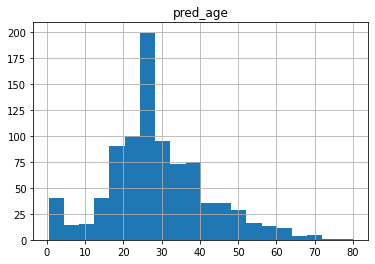

In [ ]:
a.hist(column='pred_age', bins=20)


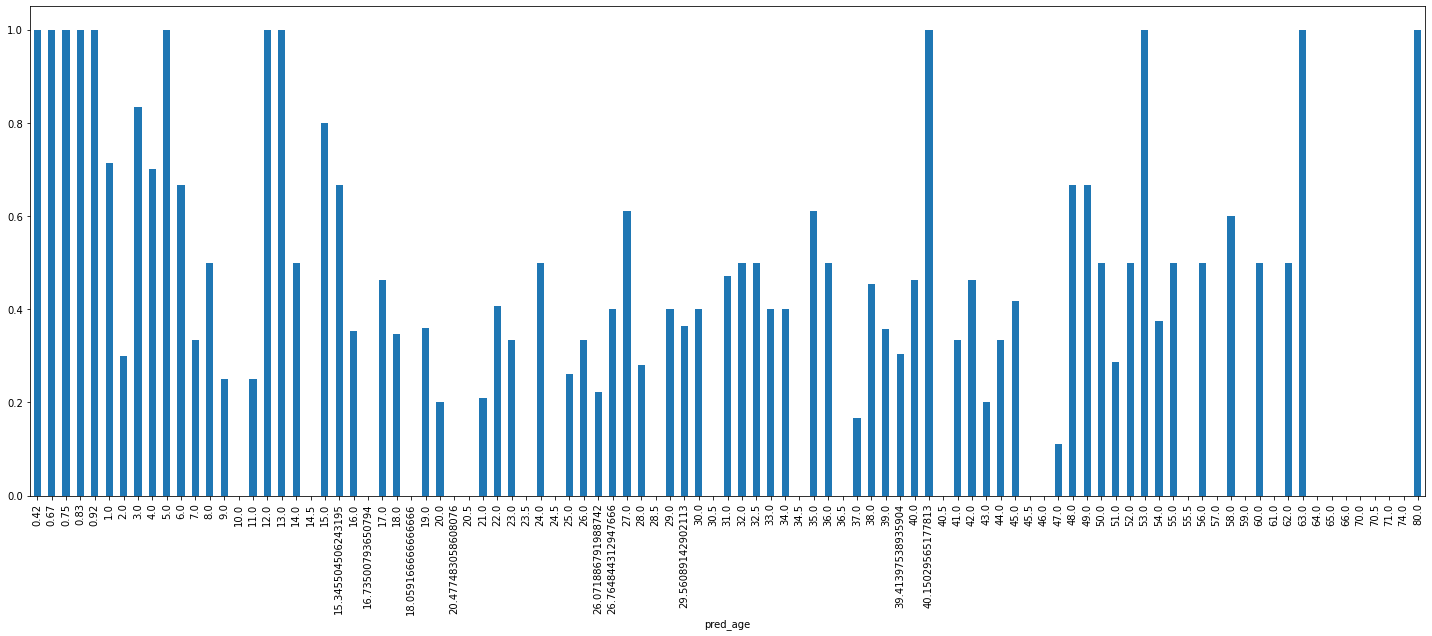

In [ ]:
a.groupby('pred_age')['Survived'].mean().plot(kind='bar', figsize=(25,9))


In [ ]:
def f2(row):
  if row['pred_age']<=13:
    value=0#child
  elif row['pred_age']<=60:
    value=1#young
  else:
    value=2 #old
  return value

a['pred_age'] = a.apply(f2, axis=1)

b['pred_age'] = b.apply(f2, axis=1)

a.head()

,Survived,Pclass,Sex,Fare,Embarked,Cabin_Exists,Family,pred_age
0,0,3,0,0,0,0,1,1
1,1,1,1,0,1,1,1,1
2,1,3,1,0,0,0,0,1
3,1,1,1,0,0,1,1,1
4,0,3,0,0,0,0,0,1


In [ ]:
c = a['Survived']
a = a.drop(['Survived'], axis=1)

c.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(a,c,test_size=0.3,random_state=7)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV


kf = KFold(n_splits=10, shuffle=True, random_state=7)


In [ ]:
# knn_params = {'n_neighbors':list(range(3,11))}

# GS1 = GridSearchCV(knn, knn_params, cv = kf, scoring='accuracy')

# GS1.fit(scaled_X_train, y_train)

# print(GS1.best_params_)

# print(GS1.best_score_)

In [ ]:

# kf = KFold(n_splits=10, shuffle=True, random_state=7)

# result = cross_val_score(knn , scaled_X_train, y_train, cv = kf)

# print(result.mean())


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

result = cross_val_score(logreg , scaled_X_train, y_train, cv = kf)

print(result.mean())


0.8203020993343573


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.3, max_depth=9, random_state=7)

# GB_params = {'n_estimators': [20, 60, 120, 180], 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 'max_depth': list(range(5, 12))}

# GS3 = GridSearchCV(gb_clf, GB_params, cv = kf, scoring='accuracy')

# GS3.fit(scaled_X_train, y_train)

# print(GS3.best_params_)

# print(GS3.best_score_)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clfRF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=9, bootstrap=True, n_jobs=-1, random_state=7)


In [ ]:

# kf = KFold(n_splits=10, shuffle=True, random_state=7)


# RF_params = {'n_estimators': [100, 300, 500, 800, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': list(range(5, 12))}

# GS2 = GridSearchCV(clfRF, RF_params, cv = kf, scoring='accuracy')

# GS2.fit(scaled_X_train, y_train)

# print(GS2.best_params_)

# print(GS2.best_score_)



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,10,8), activation='relu', solver='adam', max_iter=500)

#cross validation

result = cross_val_score(mlp , scaled_X_train, y_train, cv = kf)

print(result.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8314644137224783


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.ensemble import VotingClassifier


clf = VotingClassifier(estimators = [('knn', knn), ('GB', gb_clf), ('RFC', clfRF), ('LR', logreg), ('MLP', mlp)], voting = 'hard')

clf = clf.fit(scaled_X_train, y_train)

y_pred = clf.predict(scaled_X_test)

#cross-validation

result = cross_val_score(clf , scaled_X_train, y_train, cv = kf)

print(result.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.84431643625192


In [ ]:


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[138  18]
 [ 40  72]]
0.7835820895522388
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       156
           1       0.80      0.64      0.71       112

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268



In [ ]:
# test_b = scaler.transform(b)
# test_pred = clf.predict(test_b)

# output = pd.DataFrame({'PassengerId': e.PassengerId, 'Survived': test_pred})
# print(output)
# output.to_csv('submission.csv', index=False)

# print("Submission saved")